# lesson-6

### Библиотеки:

In [1]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np

from sklearn.datasets import load_diabetes

import matplotlib.pyplot as plt

import random

from time import time

### Программа из методички

In [2]:
X, y = load_diabetes(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state = 42)

In [4]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [5]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [6]:
def bias(y, z):
    return (y - z)

In [7]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [8]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [9]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

### Задание 1: Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [10]:
eta = 0.1
n_trees = 40
coefs = [1] * n_trees

In [11]:
max_depth = 1

t_start = time()

trees, train_errors, test_errors_1 = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

t_1 = time() - t_start
t_1

40.132094621658325

In [12]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 40 деревьев глубиной 1     с шагом 0.1 на тренировочной выборке: 2875.9379300765954
Ошибка алгоритма из 40 деревьев глубиной 1     с шагом 0.1 на тестовой выборке: 2892.7802939667286


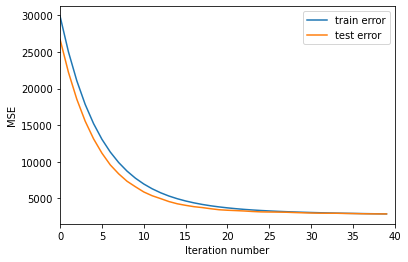

In [13]:
get_error_plot(n_trees, train_errors, test_errors_1)

In [14]:
max_depth = 2

trees, train_errors, test_errors_2 = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [15]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 40 деревьев глубиной 2     с шагом 0.1 на тренировочной выборке: 2226.562487334522
Ошибка алгоритма из 40 деревьев глубиной 2     с шагом 0.1 на тестовой выборке: 2912.5941368771264


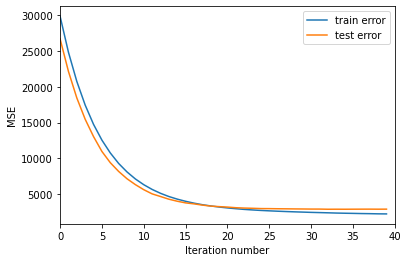

In [16]:
get_error_plot(n_trees, train_errors, test_errors_2)

In [17]:
max_depth = 3

trees, train_errors, test_errors_3 = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [18]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 40 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 1555.0436992804773
Ошибка алгоритма из 40 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 3027.5351823287283


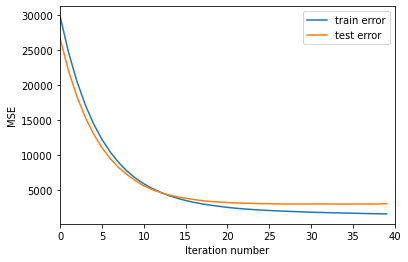

In [19]:
get_error_plot(n_trees, train_errors, test_errors_3)

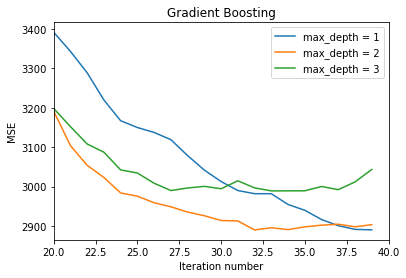

In [20]:
plt.title('Gradient Boosting')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
start = 20
end = n_trees
plt.xlim(start, end)
plt.plot(list(range(n_trees)[start:]), test_errors_1[start:end], label='max_depth = 1')
plt.plot(list(range(n_trees)[start:]), test_errors_2[start:end], label='max_depth = 2')
plt.plot(list(range(n_trees)[start:]), test_errors_3[start:end], label='max_depth = 3')
plt.legend(loc='upper right')
plt.show()

#### Вывод:

Для гиперпараметров eta = 0.1, n_trees = 40: 

При max_depth = 1 - оптимальное обучение.

При увелечении глубины деревьев, возрастает переобучение ансамбля и уменьшается стабильность модели.

### Задание 2: (опция) . Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

Перепишем функцию gb_fit:

In [21]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    random.seed(42)
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            index = list(range(y_train.shape[0]))
            random.shuffle(index)
            index = index[:y_train.shape[0]//2]
            # Получим ответы на текущей композиции
            target = gb_predict([X_train[j] for j in index], trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit([X_train[j] for j in index], bias([y_train[j] for j in index], target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [22]:
max_depth = 1

t_start = time()

trees, train_errors, test_errors_1_s = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

t_1_s = time() - t_start
t_1_s

31.467522621154785

In [23]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 40 деревьев глубиной 1     с шагом 0.1 на тренировочной выборке: 2817.130603696516
Ошибка алгоритма из 40 деревьев глубиной 1     с шагом 0.1 на тестовой выборке: 2771.019822431999


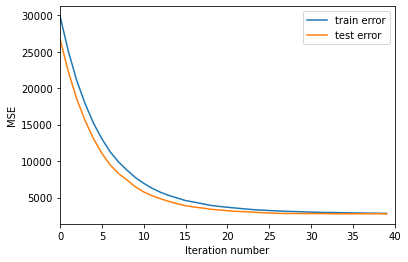

In [24]:
get_error_plot(n_trees, train_errors, test_errors_1_s)

In [25]:
max_depth = 2

trees, train_errors, test_errors_2_s = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [26]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 40 деревьев глубиной 2     с шагом 0.1 на тренировочной выборке: 2255.71458773964
Ошибка алгоритма из 40 деревьев глубиной 2     с шагом 0.1 на тестовой выборке: 2821.658752893186


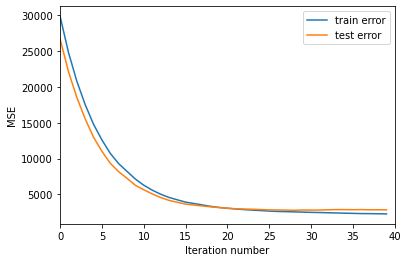

In [27]:
get_error_plot(n_trees, train_errors, test_errors_2_s)

In [28]:
max_depth = 3

trees, train_errors, test_errors_3_s = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [29]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 40 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 1652.4945117273164
Ошибка алгоритма из 40 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 2986.5468448151614


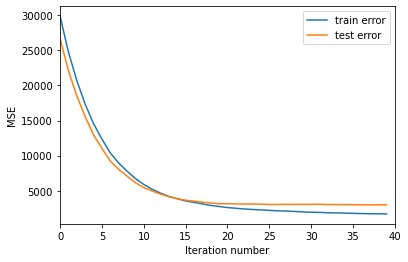

In [30]:
get_error_plot(n_trees, train_errors, test_errors_3_s)

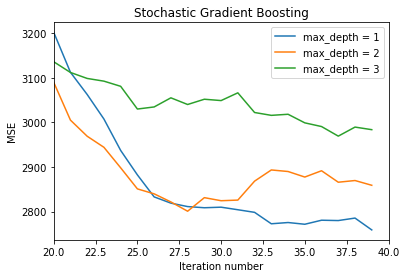

In [31]:
plt.title('Stochastic Gradient Boosting')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
start = 20
end = n_trees
plt.xlim(start, end)
plt.plot(list(range(n_trees)[start:]), test_errors_1_s[start:end], label='max_depth = 1')
plt.plot(list(range(n_trees)[start:]), test_errors_2_s[start:end], label='max_depth = 2')
plt.plot(list(range(n_trees)[start:]), test_errors_3_s[start:end], label='max_depth = 3')
plt.legend(loc='upper right')
plt.show()

Лучшие результаты при одинаковых данных и гиперпараметрах:

Gradient Boosting:

In [32]:
[test_errors_1[-1], t_1]

[2889.9450297967255, 40.132094621658325]

Stochastic Gradient Boosting:

In [33]:
[test_errors_1_s[-1], t_1_s]

[2758.843254534442, 31.467522621154785]

#### Вывод:

Стохастический градиентный бустинг работает намного быстрее и качественнее, потому что мы берём лишь часть выборки для обучения каждого нового базового алгоритма, тем самым уменьшаем переобучение и увеличиваем стабильность модели.

### Задание 3:(опция). Реализовать алгоритм градиетного бустинга, основанный на реализации решающего дерева из ДЗ4 / методички к уроку 4. Сделать выводы о качестве алгоритма по сравнению с реализацией из п.1.

Программа из методички к уроку 4:

In [34]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [35]:
# Класс терминального узла (листа)

class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = np.mean(self.labels) 

In [36]:
# Расчет дисперсии

def dispersion(labels):
    if len(labels) == 1:
        return 0
    return np.var(labels)

In [37]:
# Расчет качества

def quality(left_labels, right_labels, current_dispersion):

    # доля выбоки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return current_dispersion - p * dispersion(left_labels) - (1 - p) * dispersion(right_labels)

In [38]:
# Разбиение датасета в узле

def split(data, labels, index, t):
    
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
        
    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [39]:
# Нахождение наилучшего разбиения

def find_best_split(data, labels):
    
    current_dispersion = dispersion(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    for index in range(n_features):
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique([row[index] for row in data])
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            
            current_quality = quality(true_labels, false_labels, current_dispersion)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [40]:
# Построение дерева с помощью рекурсивной функции

def build_tree(data, labels, max_depth = None):
           
    #  Прекращаем рекурсию, когда достигнута глубина дерева max_depth
    if max_depth is not None:
        if max_depth == 0:
            return Leaf(data, labels)
        else:
            max_depth -= 1

    quality, t, index = find_best_split(data, labels)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if quality == 0:
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_tree(true_data, true_labels, max_depth)
    false_branch = build_tree(false_data, false_labels, max_depth)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [41]:
def classify_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return classify_object(obj, node.true_branch)
    else:
        return classify_object(obj, node.false_branch)

In [42]:
def predict(data, tree):
    
    classes = []
    for obj in data:
        prediction = classify_object(obj, tree)
        classes.append(prediction)
    return classes

Перепишем функцию gb_predict и gb_fit:

In [43]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * predict([x], alg)[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [44]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree = build_tree(X_train, y_train, max_depth)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree = build_tree(X_train, bias(y_train, target), max_depth)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [45]:
max_depth = 1

t_start = time()

trees, train_errors, test_errors_1_my = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

t_1_my = time() - t_start
t_1_my

D:\anakonda\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\anakonda\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
D:\anakonda\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


3.9542324542999268

In [46]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 40 деревьев глубиной 1     с шагом 0.1 на тренировочной выборке: 2875.937930076595
Ошибка алгоритма из 40 деревьев глубиной 1     с шагом 0.1 на тестовой выборке: 2892.7802939667286


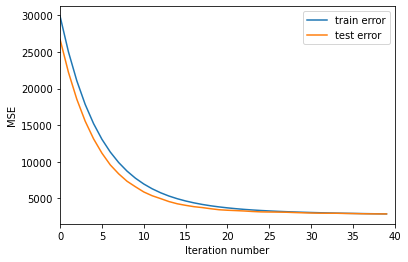

In [47]:
get_error_plot(n_trees, train_errors, test_errors_1_my)

Стохастический градиентный бустинг:

In [48]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    random.seed(42)
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree = build_tree(X_train, y_train, max_depth)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            
            index = list(range(y_train.shape[0]))
            random.shuffle(index)
            index = index[:y_train.shape[0]//2]
            
            # Получим ответы на текущей композиции
            target = gb_predict([X_train[j] for j in index], trees, coefs, eta)
            # алгоритмы начиная со второго обучаем на сдвиг
            tree = build_tree(np.array([X_train[j] for j in index]), bias([y_train[j] for j in index], target), max_depth)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [49]:
max_depth = 1

t_start = time()

trees, train_errors, test_errors_1_s_my = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

t_1_s_my = time() - t_start
t_1_s_my

2.4965081214904785

In [50]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 40 деревьев глубиной 1     с шагом 0.1 на тренировочной выборке: 2815.91448916875
Ошибка алгоритма из 40 деревьев глубиной 1     с шагом 0.1 на тестовой выборке: 2768.4975944370103


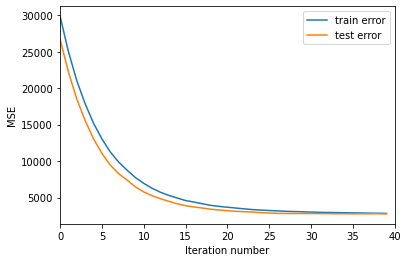

In [51]:
get_error_plot(n_trees, train_errors, test_errors_1_s_my)

Gradient Boosting с sklearn.tree:

In [52]:
[test_errors_1[-1], t_1]

[2889.9450297967255, 40.132094621658325]

Gradient Boosting с собственной реализацией tree:

In [53]:
[test_errors_1_my[-1], t_1_my]

[2889.945029796727, 3.9542324542999268]

Stochastic Gradient Boosting с sklearn.tree:

In [54]:
[test_errors_1_s[-1], t_1_s]

[2758.843254534442, 31.467522621154785]

Stochastic Gradient Boosting с собственной реализацией tree:

In [55]:
[test_errors_1_s_my[-1], t_1_s_my]

[2756.310641980439, 2.4965081214904785]

#### Вывод:

Собственная реализация работает гораздо быстрее при том же или даже большем качестве.